In [1]:
import astropy.io.fits as fits
import pandas as pd
import matplotlib.pylab as plt
import urllib
import io
import numpy as np
from contextlib import closing


In [2]:
import boilerplate

In [3]:
example_data = pd.read_csv("example/integral_isgri_.area", names=["energy", "effarea"], delim_whitespace=True)

In [4]:
def get_isgri_matrix(n=43):    
    return fits.open(
        io.BytesIO(
            urllib.request.urlopen(
                f"ftp://isdcarc.unige.ch/arc/rev_3/ic/ibis/rsp/isgr_rmf_rsp_{n:04d}.fits"
            ).read()
        )
    )


In [5]:
m = get_isgri_matrix()
effarea = np.stack(m[1].data['MATRIX']).sum(1)
energy = (m[1].data['ENERG_LO'] + m[1].data['ENERG_HI'])*0.5

No handles with labels found to put in legend.


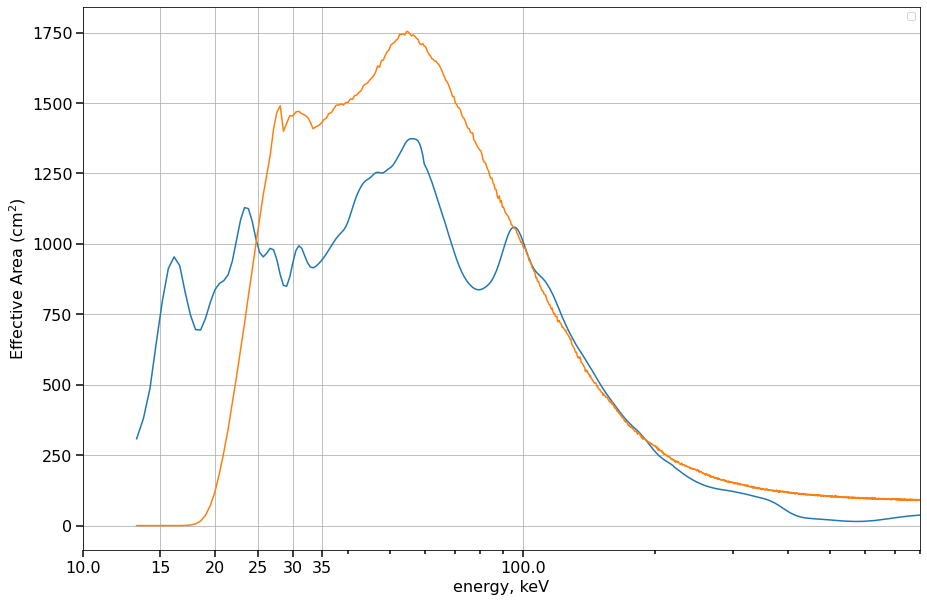

In [6]:
plt.figure(figsize=(15, 10))

plt.plot(
        example_data.energy,
        example_data.effarea,
    )

plt.plot(
        energy,
        effarea,
    )

boilerplate.axes_legend_label(
    [plt.gca()],
    xlabel="energy, keV",
    ylabel="Effective Area (cm$^2$)"
)


plt.semilogx()

boilerplate.extra_ticks([15, 20, 25, 30, 35])
plt.xlim([10,800])
plt.grid()

In [7]:
pd.DataFrame(dict(
    energy=energy,
    effarea=effarea,
)).to_csv("integral_isgri_.area-isgr_rsp_0043")